<h3>Setup</h3>

In [1]:
# Libraries
import torch
import sys
import platform


# MacOs
if platform.system() == "Darwin":
    main_dir = './'
    data_dir = '../data/'
    weights_dir = '../weights/'
    
    device = 'cpu'
    #device = 'mps' if torch.backends.mps.is_available()  else 'cpu'
    
    print(f"System: MacOs\nDevice: {device}\nMain_dir: {main_dir}")

# Linux
elif platform.system() == "Linux" and 'google.colab' not in sys.modules:
    main_dir = './'
    data_dir = '../data/'
    detector_weights_dir = '../weights/'
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    print(f"System: Linux\nDevice: {device}\nMain_dir: {main_dir}")

# Colab
elif platform.system() == "Linux" and 'google.colab' in sys.modules:
    !pip install pytesseract
    from google.colab import drive
    
    drive.mount('/content/drive')
    
    main_dir = '/content/drive/MyDrive/Università/Artificial Intelligence and Robotics/1° Anno/2° Semestre/Vision and Perception/Project/'
    data_dir = 'data/'
    detector_weights_dir = 'weights/'
    
    sys.path.insert(0, main_dir)
    sys.path.insert(1, main_dir+'src/')
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    print(f"System: Colab\nDevice: {device}\nMain_dir: {main_dir}")

# Unknown
else:
    print("System unknown")


System: MacOs
Device: cpu
Main_dir: ./


<h3>Prepare datasets and loaders</h3>

In [2]:
from modules import dataset

PREPARE_CSV = False
PLOT_STATS = False

In [3]:
if PREPARE_CSV: 
    df = dataset.xml2csv(main_dir=main_dir, path_folder=data_dir)
    df.head()

In [4]:
train_ds, valid_ds = dataset.get_datasets(data_dir=main_dir+data_dir, csv_file='dataset.csv')

In [5]:
if PLOT_STATS: dataset.dataset_stats(dataset=train_ds)

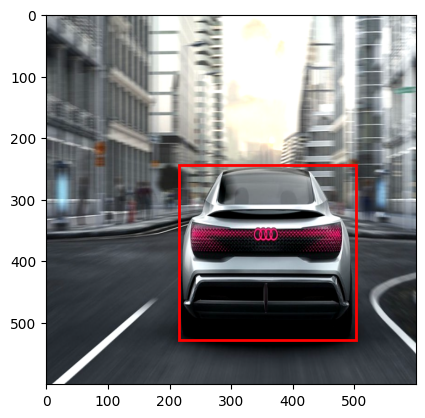

In [6]:
dataset.plot_image_from_dataset(dataset=train_ds, idx=0)

In [7]:
train_dl, valid_dl = dataset.get_dataloaders(train_ds=train_ds, valid_ds=valid_ds, batch_size=8)

<h3>Training</h3>

In [8]:
TRAIN_MODEL=False
LOAD_MODEL=False

In [9]:
if TRAIN_MODEL:
    from modules import model, training
    
    detector = model.get_plateDetectorModel(num_classes=3, feature_extraction=True)
    if LOAD_MODEL:
        detector.load_state_dict(torch.load(main_dir+weights_dir+'detector_weights/detector.pt'))

    optimizer = torch.optim.SGD([p for p in detector.parameters() if p.requires_grad],
                                lr = 0.005,
                                momentum = 0.9,
                                weight_decay = 0.0005)
    
    losses = training.training_and_validation(model=detector.to(device),
                                                optimizer=optimizer,
                                                num_epochs=50,
                                                train_loader=train_dl,
                                                valid_loader=valid_dl,
                                                device=device,
                                                weights_dir=main_dir+weights_dir+'detector_weights/',
                                                verbose=2)
    
    training.plot_losses(train_epoch_losses=losses[0], valid_epoch_losses=losses[1])

<h3>Inference</h3>

In [10]:
from modules import inference, real_time_object_detector

COMPUTE_ONE_IMAGE = False
COMPUTE_REAL_TIME_OBJECT_DETECTOR = True

In [11]:
if COMPUTE_ONE_IMAGE: 
    import cv2
    detector = inference.load_model_for_inference(weights_file=main_dir+weights_dir+'detector_weights/detector.pt', device=device)
    cv2_vehicles_cfg = {'fontFace':cv2.FONT_HERSHEY_SIMPLEX, 'fontScale':0.5, 'color':(0,0,255), 'thickness':2, 'lineType':cv2.LINE_AA}
    cv2_plates_cfg = {'fontFace':cv2.FONT_HERSHEY_SIMPLEX, 'fontScale':0.5, 'color':(255,0,0), 'thickness':2, 'lineType':cv2.LINE_AA}
    real_time_object_detector.plot_one_image(model=detector, 
                                            img_param=data_dir+'test/TEST_2.jpeg', 
                                            sr_weights_path=weights_dir+'edsr_weights/EDSR_x3.pb', 
                                            cv2window=False, 
                                            cv2imshow=False, 
                                            plt_plot=True, 
                                            cv2_vehicles_cfg=cv2_vehicles_cfg, 
                                            cv2_plates_cfg=cv2_plates_cfg)

In [12]:
if COMPUTE_REAL_TIME_OBJECT_DETECTOR: 
    import cv2
    detector = inference.load_model_for_inference(weights_file=main_dir+weights_dir+'detector_weights/detector.pt', device=device)
    cv2_vehicles_cfg = {'fontFace':cv2.FONT_HERSHEY_SIMPLEX, 'fontScale':0.8, 'color':(0,0,255), 'thickness':2, 'lineType':cv2.LINE_AA}
    cv2_plates_cfg = {'fontFace':cv2.FONT_HERSHEY_SIMPLEX, 'fontScale':0.8, 'color':(255,0,0), 'thickness':2, 'lineType':cv2.LINE_AA}
    real_time_object_detector.real_time_object_detector(model=detector, 
                                                        video_path=data_dir+'test/TEST.mp4', 
                                                        sr_weights_path=weights_dir+'edsr_weights/EDSR_x3.pb',
                                                        cv2_vehicles_cfg=cv2_vehicles_cfg, 
                                                        cv2_plates_cfg=cv2_plates_cfg,
                                                        new_frame_folder=main_dir+'../output_video/')

Folder './../output_video/' already exist.
----------------------------------------------------------------------
plate_string: HOSOLLP
